In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Функція гіпотези лінійної регресії у векторному вигляді

In [2]:
def linear_regression(theta, X):
    return np.dot(X, theta)

## Функція для обчислення функції втрат у векторному вигляді

In [3]:
def compute_cost(theta, X, y):
    m = len(y)
    residuals = np.dot(X, theta) - y
    cost = np.sum(residuals ** 2) / (2 * m)
    return cost

## Один крок градієнтного спуску

In [4]:
def gradient_step(w_0, w_1, grad_0, grad_1, learning_rate = 0.001):

    w_0 = w_0 - learning_rate*grad_0
    w_1 = w_1 - learning_rate*grad_1

    return w_0, w_1

In [5]:
def gradient_descent(weights, df, num_iter, learning_rate = 0.001, epsilon = 0.0000000001):

    w_0, w_1 = weights
    loss = loss_function(w_0, w_1, df)
    loss_history = [loss]

    for i in range(num_iter):

        d_w_0 = grad_w_0(w_0, w_1, df)
        d_w_1 = grad_w_1(w_0, w_1, df)
        w_0, w_1 = grad_step(w_0, w_1, d_w_0, d_w_1, learning_rate = learning_rate)
        loss = loss_function(w_0, w_1, df)

        if abs(loss-loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break

        loss_history.append(loss)

    return w_0, w_1, loss_history

## Прогноз ціни на будинок

In [6]:
df = pd.read_csv('Housing.csv')

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: xlabel='area', ylabel='price'>

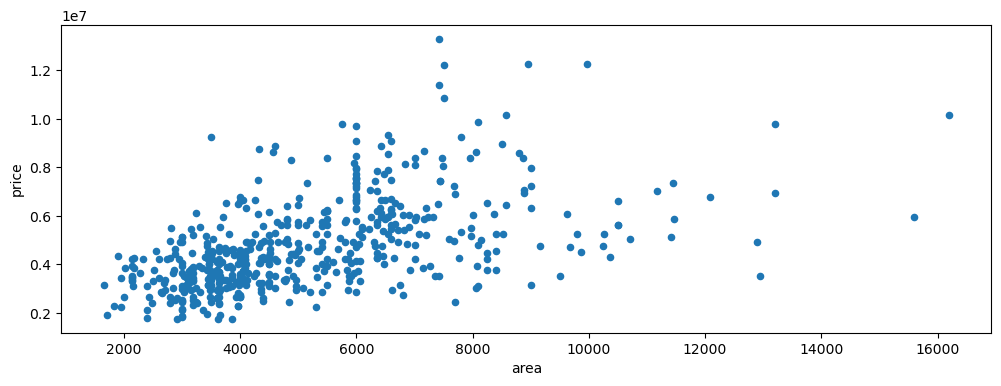

In [8]:
df.plot(x = 'area', y = 'price', kind = 'scatter', figsize = (12, 4))

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


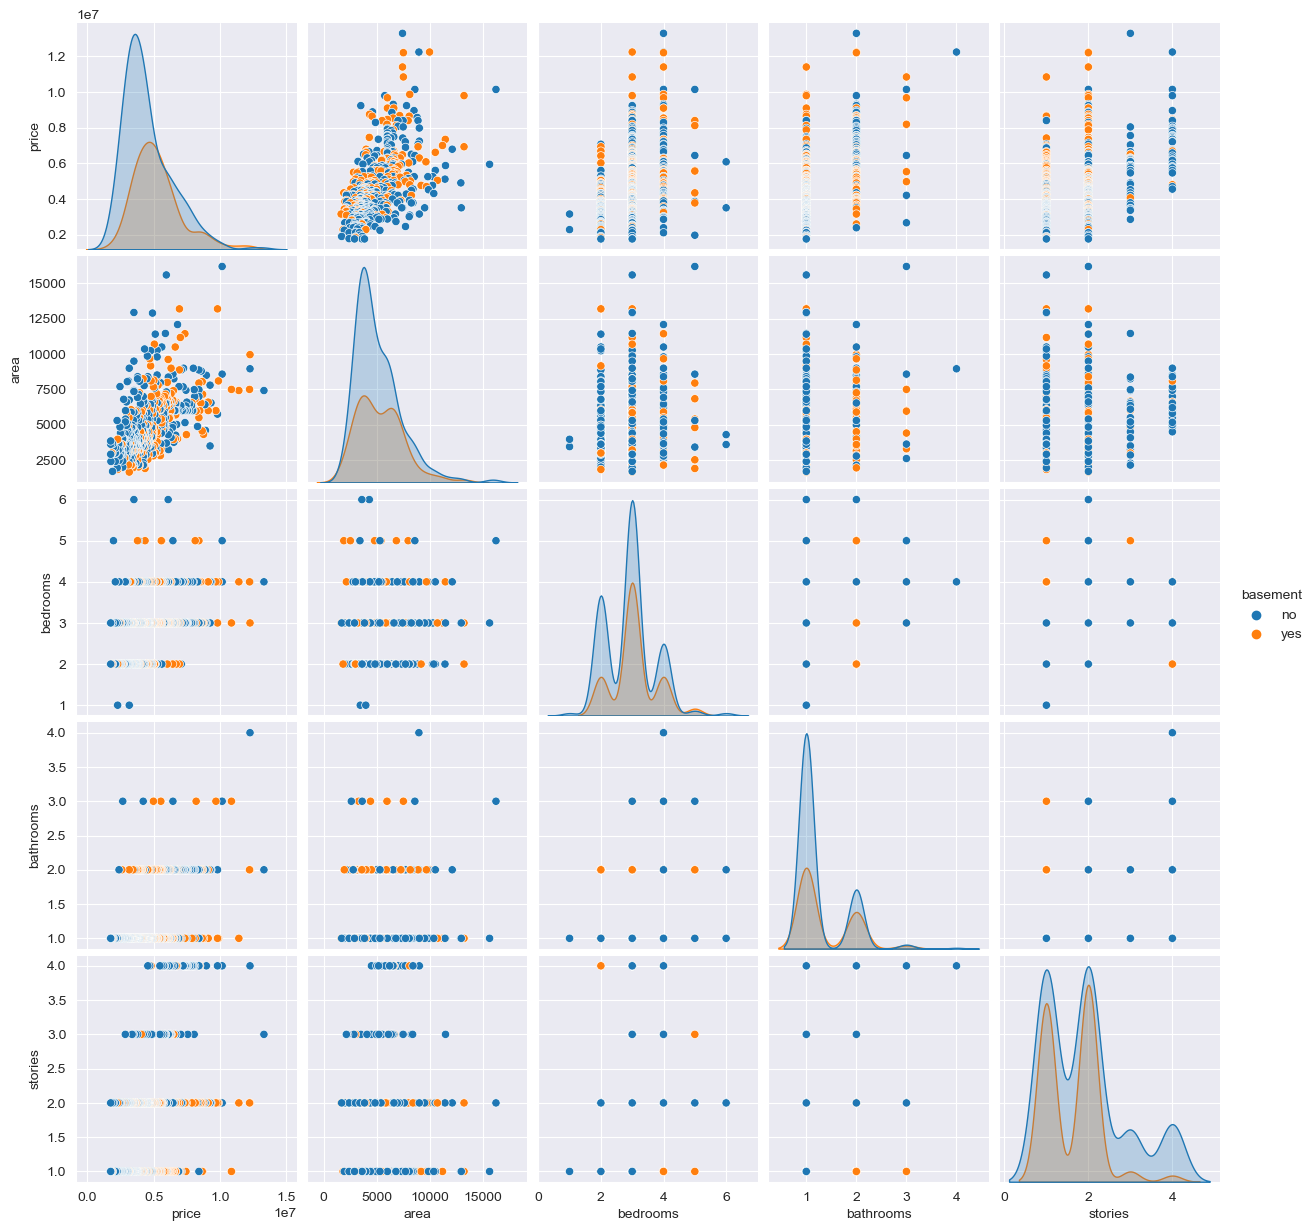

In [9]:
sns.set_style('darkgrid')

sns.pairplot(df,
            vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories'],
            hue = 'basement')
plt.show()

In [10]:
df_corr = df[['area', 'price']].corr()
df_corr

,area,price
area,1.000000,0.535997
price,0.535997,1.000000


In [11]:
def h(w_0, w_1, x):
    return w_0 + w_1*x

In [12]:
def loss_function(w_0, w_1, df):
    
    n = df.area.shape[0]
    cost = 0
    
    for x, y in zip(df.area, df.price):
        cost = cost + (h(w_0, w_1, x) - y)**2
        
    return cost/(2*n)

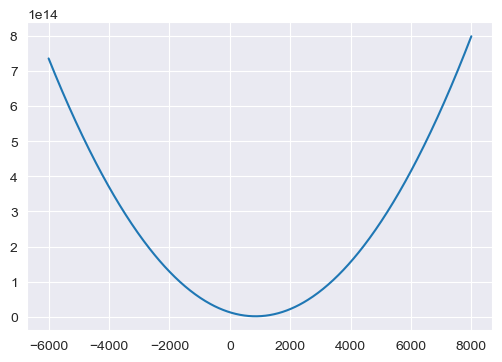

In [13]:
w_0 = 0

w_1 = np.linspace(-6000, 8000, 500)
plt.figure(figsize=(6, 4))
plt.plot(w_1, [loss_function(w_0, w, df) for w in w_1])

In [14]:
def normalization(data):

    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = []
    for x in data:
        norm_x = (x - mean)/value_range
        result.append(norm_x)
  
    return result

norm = pd.DataFrame()

norm['price'] = normalization(df.price)
norm['area'] = normalization(df.area)

norm.tail(5)

,price,area
540,-0.255128,-0.147804
541,-0.259704,-0.189041
542,-0.261189,-0.105192
543,-0.261189,-0.153989
544,-0.261189,-0.089384


In [19]:
def grad_descent(weights, df, num_iter, learning_rate = 0.001, epsilon = 0.0000000001):

    w_0, w_1 = weights
    loss = loss_function(w_0, w_1, df)
    loss_history = [loss]

    for i in range(num_iter):

        d_w_0 = grad_w_0(w_0, w_1, df)
        d_w_1 = grad_w_1(w_0, w_1, df)
        w_0, w_1 = gradient_step(w_0, w_1, d_w_0, d_w_1, learning_rate = learning_rate)
        loss = loss_function(w_0, w_1, df)

        if abs(loss-loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break

        loss_history.append(loss)

    return w_0, w_1, loss_history

In [21]:
def grad_w_0(w_0, w_1, df):

    n = df.area.shape[0]
    cost = 0

    for x, y in zip(df.area, df.price):
        cost = cost + (h(w_0, w_1, x) - y)

    return cost/n

def grad_w_1(w_0, w_1, df):

    n = df.area.shape[0]
    cost = 0

    for x, y in zip(df.area, df.price):
        cost = cost + (h(w_0, w_1, x) - y)*x

    return cost/n

In [24]:
w_0, w_1, history = grad_descent((0., 0.), norm, 1000, learning_rate = 0.1)

In [25]:
w_0, w_1, history_ext = grad_descent((w_0, w_1), norm, 1000, learning_rate = 0.1)

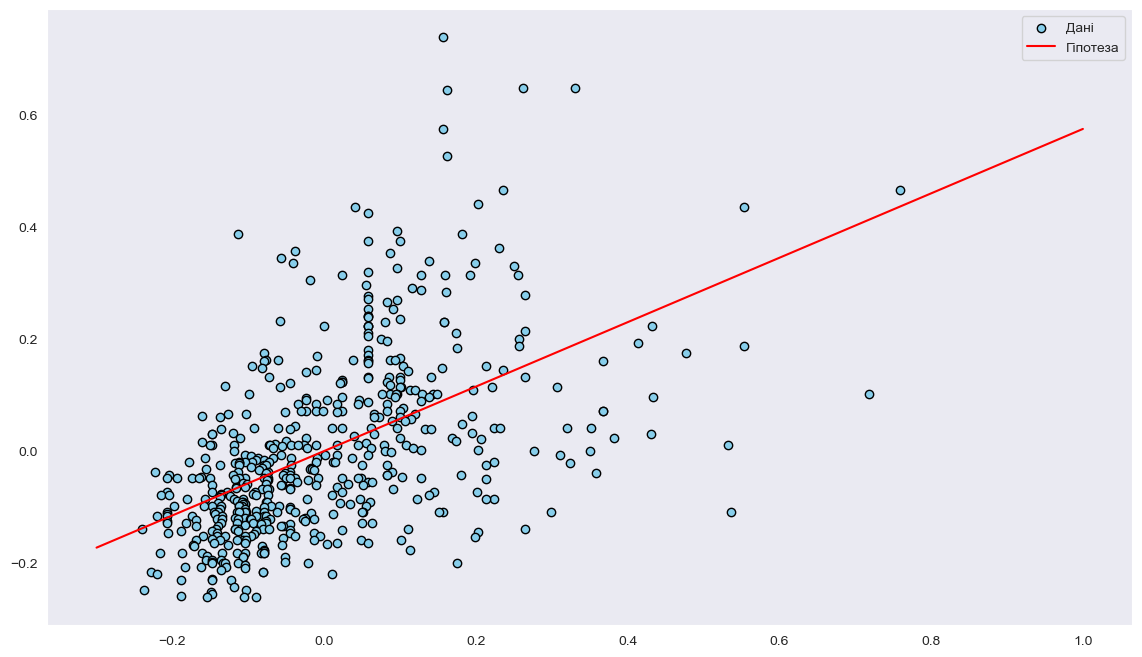

In [26]:
plt.figure(figsize=(14, 8))
plt.scatter(norm.area, norm.price, color='skyblue', label='Дані', edgecolors='black')  # Використання крапок для представлення даних
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(w_0, w_1, x), color='red', label='Гіпотеза')
plt.grid()
plt.legend()
plt.show()